In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [50]:
df = pd.read_csv("insurance.csv")
df

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01
...,...,...,...,...,...,...,...,...,...,...
1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1340 non-null   int64  
 1   age            1335 non-null   float64
 2   gender         1340 non-null   object 
 3   bmi            1340 non-null   float64
 4   bloodpressure  1340 non-null   int64  
 5   diabetic       1340 non-null   object 
 6   children       1340 non-null   int64  
 7   smoker         1340 non-null   object 
 8   region         1337 non-null   object 
 9   claim          1340 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 104.8+ KB


In [52]:
sns.set(style="whitegrid", palette="Set2", font_scale=1.1)

In [53]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1335    False
1336    False
1337    False
1338    False
1339    False
Length: 1340, dtype: bool

In [54]:
df.isna().sum()

Id               0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [55]:
df.dropna(inplace=True)

In [56]:
df.shape

(1332, 10)

In [57]:
df.isna().sum()

Id               0
age              0
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           0
claim            0
dtype: int64

In [58]:
df.describe()

,Id,age,bmi,bloodpressure,children,claim
count,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000
mean,674.474474,38.086336,30.658333,94.189189,1.099850,13325.246426
std,384.703785,11.112804,6.118967,11.445173,1.205958,12109.620712
min,1.000000,18.000000,16.000000,80.000000,0.000000,1121.870000
25%,341.750000,29.000000,26.200000,86.000000,0.000000,4760.157500
50%,674.500000,38.000000,30.350000,92.000000,1.000000,9412.965000
75%,1007.250000,47.000000,34.725000,99.000000,2.000000,16781.327500
max,1340.000000,60.000000,53.100000,140.000000,5.000000,63770.430000


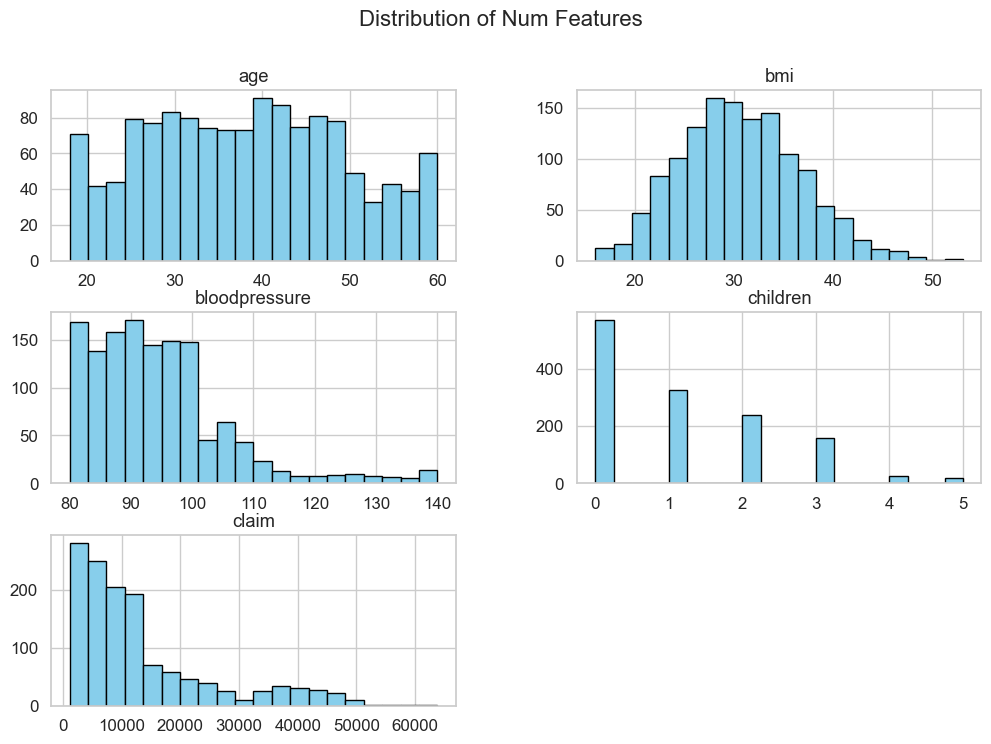

In [59]:
numeric_cols = ["age", "bmi", "bloodpressure", "children", "claim"]
df[numeric_cols].hist(bins=20, figsize=(12, 8), color = "skyblue", edgecolor="black")
plt.suptitle("Distribution of Num Features", fontsize=16)
plt.show()

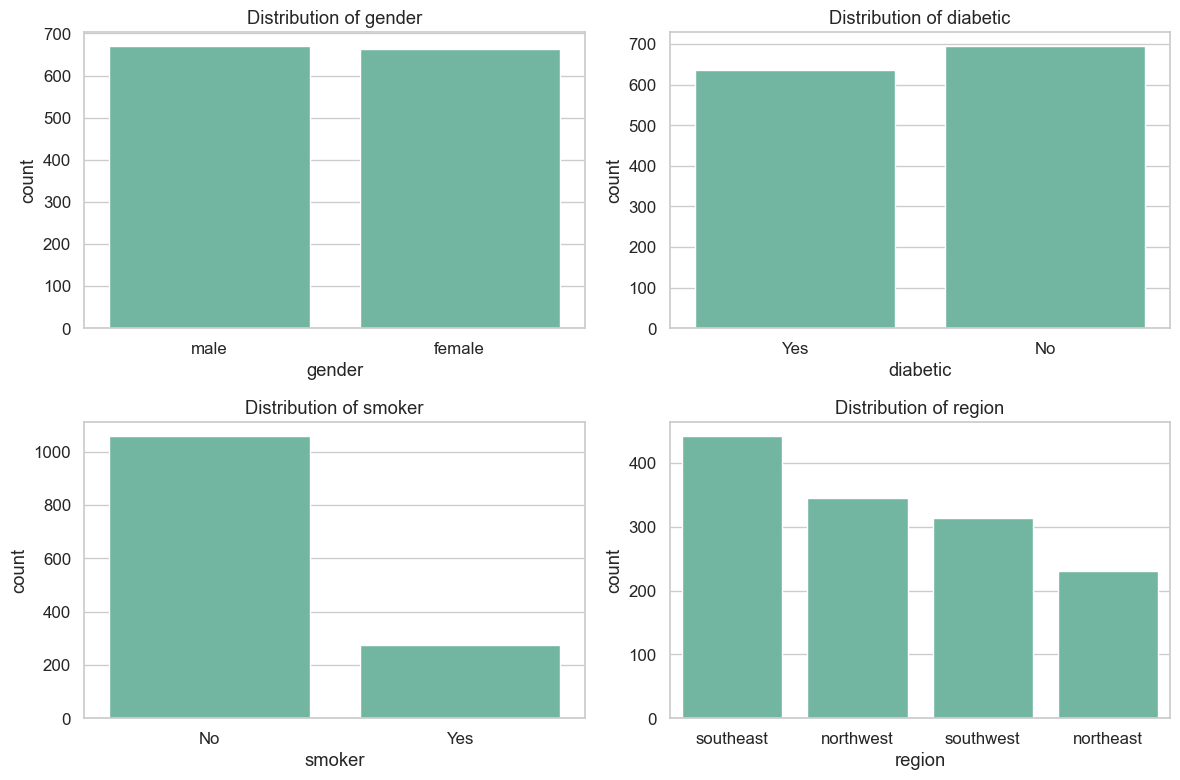

In [60]:
cat_cols = ["gender", "diabetic", "smoker", "region"]

plt.figure(figsize=(12, 8))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data = df, x = col)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

In [61]:
df.groupby(["gender", "smoker"])["claim"].mean().round(2)

gender  smoker
female  No         8762.30
        Yes       30679.00
male    No         8169.25
        Yes       33042.01
Name: claim, dtype: float64

Text(0.5, 1.0, 'Average insurance claim by Gender & Smoking status')

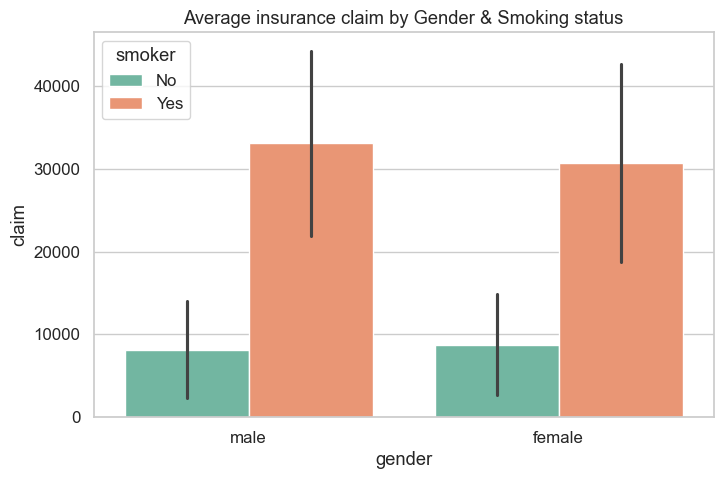

In [62]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="gender", y="claim", hue="smoker", estimator="mean", errorbar="sd")
plt.title("Average insurance claim by Gender & Smoking status")

In [63]:
pivot_region_diabetic = df.groupby(["region", "diabetic"])["claim"].mean().unstack()

In [64]:
pivot_region_diabetic.round(2)

diabetic,No,Yes
region,,
northeast,16966.86,16818.30
northwest,11442.83,12224.96
southeast,13578.72,12574.09
southwest,13069.91,12313.74


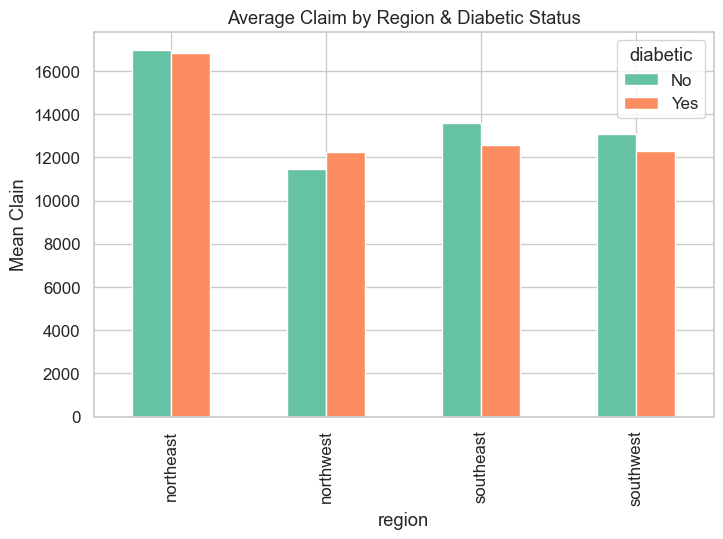

In [65]:
pivot_region_diabetic.plot(kind="bar", figsize= (8, 5))
plt.title("Average Claim by Region & Diabetic Status")
plt.ylabel("Mean Clain")
plt.show()

In [66]:
pivot_table = pd.pivot_table(df, values="claim", index="region", columns="smoker", aggfunc="mean")
pivot_table.round(2)

smoker,No,Yes
region,,
northeast,11666.11,29673.54
northwest,8076.20,30192.00
southeast,7444.14,34845.00
southwest,8294.75,32269.06


In [67]:
pivot_table = pd.pivot_table(df, values="claim", index="children", columns="diabetic", aggfunc="mean")
pivot_table.round(2)

diabetic,No,Yes
children,,
0,12967.40,11985.29
1,12730.46,12732.06
2,15567.77,14579.36
3,13807.61,17091.26
4,14106.63,13573.35
5,8519.04,9205.59


In [68]:
numeric_cols

['age', 'bmi', 'bloodpressure', 'children', 'claim']

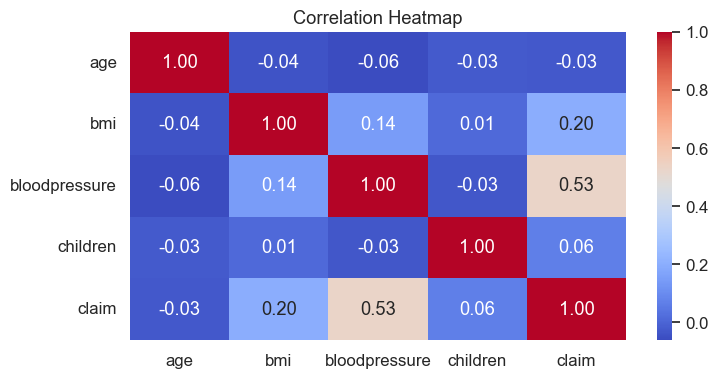

In [69]:
plt.figure(figsize=(8 ,4))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

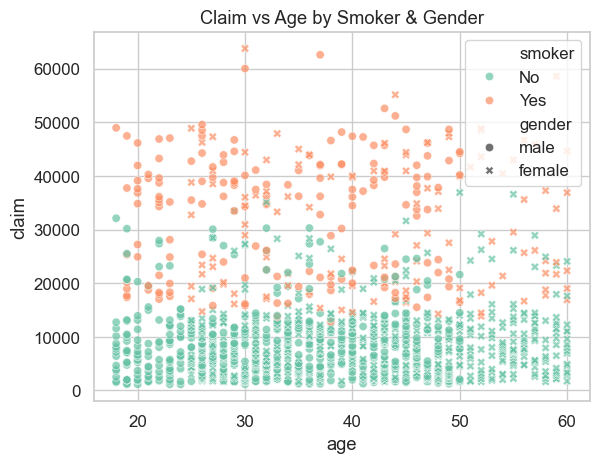

In [70]:
sns.scatterplot(data= df, x="age", y="claim", hue="smoker", style="gender", alpha=0.7)
plt.title("Claim vs Age by Smoker & Gender")
plt.show()

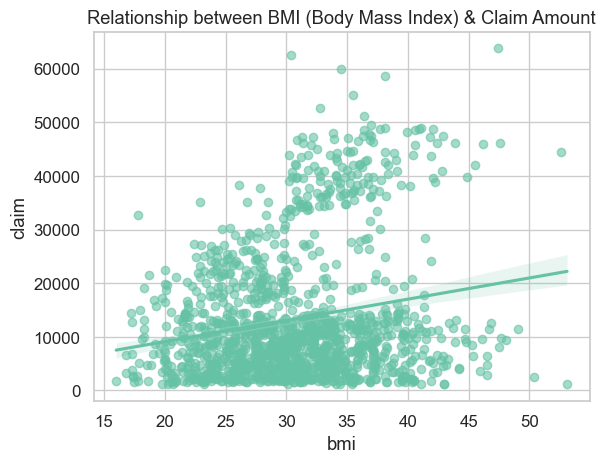

In [71]:
sns.regplot(data= df, x="bmi", y="claim", scatter_kws={"alpha":0.6})
plt.title("Relationship between BMI (Body Mass Index) & Claim Amount")
plt.show()

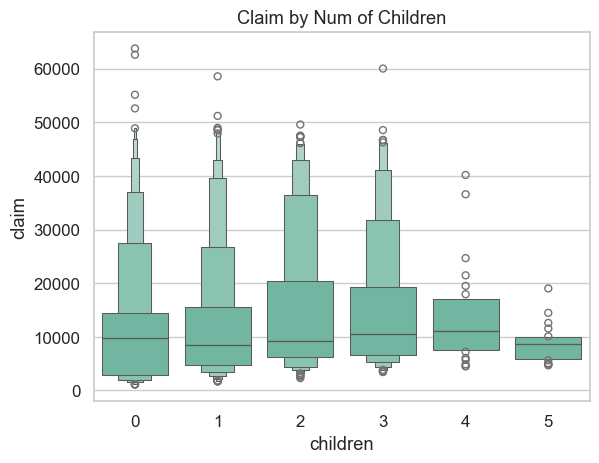

In [72]:
sns.boxenplot(data=df, x="children", y="claim")
plt.title("Claim by Num of Children")
plt.show()

In [73]:
df["age_group"] = pd.cut(df["age"], bins = [0, 18, 30, 45, 60, 100], labels=["<18", "18-30", "31-45", "46-60", "60+"])

In [74]:
df

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,age_group
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87,31-45
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51,18-30
7,8,19.0,male,41.1,100,No,0,No,northwest,1146.80,18-30
8,9,20.0,male,43.0,86,No,0,No,northwest,1149.40,18-30
9,10,30.0,male,53.1,97,No,0,No,northwest,1163.46,18-30
...,...,...,...,...,...,...,...,...,...,...,...
1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40,31-45
1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07,46-60
1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40,18-30
1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87,31-45


In [75]:
df["age_group"].value_counts()

age_group
31-45    553
46-60    383
18-30    380
<18       16
60+        0
Name: count, dtype: int64

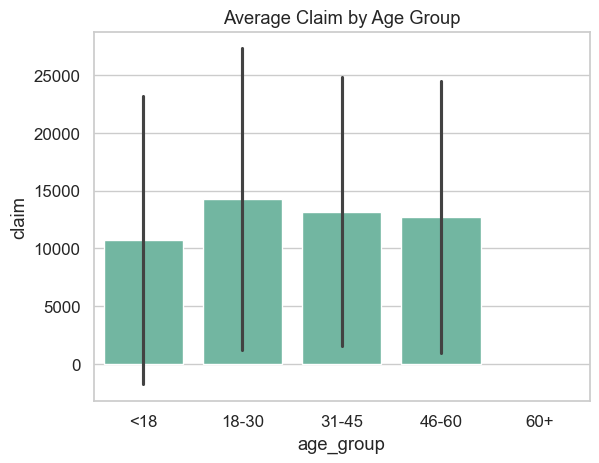

In [76]:
sns.barplot(data=df, x="age_group", y="claim", estimator="mean", errorbar="sd")
plt.title("Average Claim by Age Group")
plt.show()

In [77]:
df["bmi_category"] = pd.cut(df["bmi"], bins=[0, 18.5, 24.9, 29.9, 100], labels=["Underweight", "Normal", "Overweight", "Obese"])

In [78]:
df["bmi_category"].value_counts()

bmi_category
Obese          702
Overweight     387
Normal         222
Underweight     21
Name: count, dtype: int64

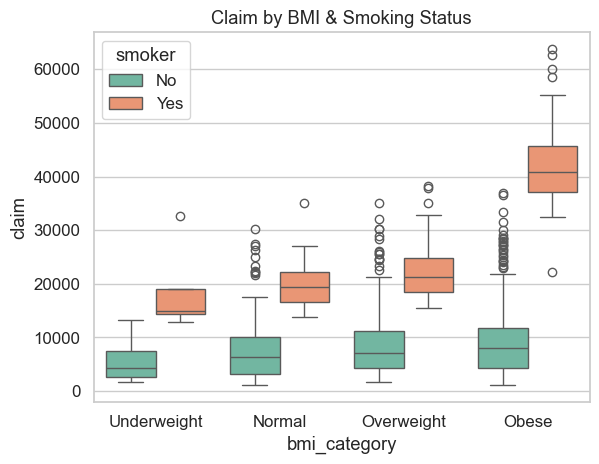

In [79]:
sns.boxplot(data=df, x="bmi_category", y="claim", hue="smoker")
plt.title("Claim by BMI & Smoking Status")
plt.show()

In [80]:
region_stats = df.groupby("region").agg(
    smoker_rate = ("smoker", lambda x: (x=="Yes").mean() * 100),
    mean_claim = ("claim", "mean")
).reset_index()

In [81]:
region_stats.round(2)

,region,smoker_rate,mean_claim
0,northeast,29.00,16889.04
1,northwest,16.81,11794.22
2,southeast,20.59,13085.50
3,southwest,18.47,12723.13


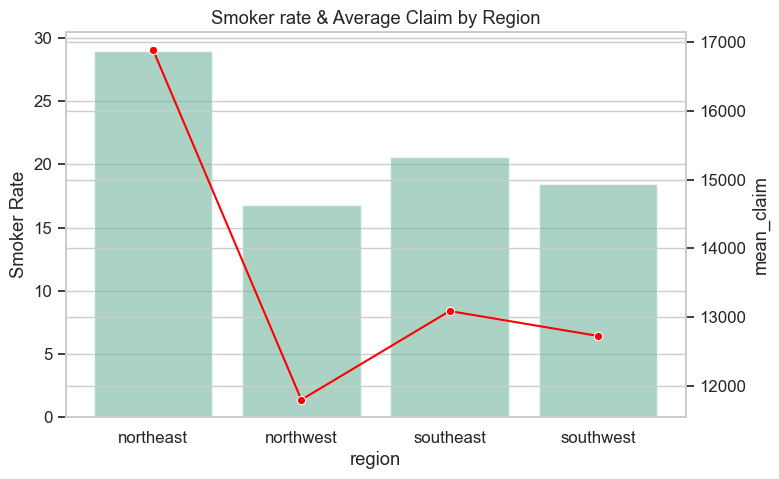

In [82]:
fig, ax1 = plt.subplots(figsize=(8, 5))
sns.barplot(data = region_stats, x="region", y="smoker_rate", ax=ax1, alpha=0.6)
ax2 = ax1.twinx()
sns.lineplot(data=region_stats, x="region", y="mean_claim", ax=ax2, color="red", marker="o")

ax1.set_ylabel("Smoker Rate")
ax2.set_label("Average Claim")
plt.title("Smoker rate & Average Claim by Region")
plt.show()

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib

In [84]:
df.columns

Index(['Id', 'age', 'gender', 'bmi', 'bloodpressure', 'diabetic', 'children',
       'smoker', 'region', 'claim', 'age_group', 'bmi_category'],
      dtype='object')

In [85]:
X = df[["age", "gender", "bmi", "bloodpressure", "diabetic", "children", "smoker"]]
y = df["claim"]

In [86]:
cat_cols = ["gender", "diabetic", "smoker"]
label_encoders = {}

In [87]:
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

    joblib.dump(le, f"label_encoder_{col}.pkl")

/var/folders/z2/_32y24y95v76r4t2m9x3m34r0000gn/T/ipykernel_23732/1530066519.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
/var/folders/z2/_32y24y95v76r4t2m9x3m34r0000gn/T/ipykernel_23732/1530066519.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
/var/folders/z2/_32y24y95v76r4t2m9x3m34r0000gn/T/ipykernel_23732/1530066519.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

In [88]:
X

,age,gender,bmi,bloodpressure,diabetic,children,smoker
0,39.0,1,23.2,91,1,0,0
1,24.0,1,30.1,87,0,0,0
7,19.0,1,41.1,100,0,0,0
8,20.0,1,43.0,86,0,0,0
9,30.0,1,53.1,97,0,0,0
...,...,...,...,...,...,...,...
1335,44.0,0,35.5,88,1,0,1
1336,59.0,0,38.1,120,0,1,1
1337,30.0,1,34.5,91,1,3,1
1338,37.0,1,30.4,106,0,0,1


In [89]:
label_encoders

{'gender': LabelEncoder(),
 'diabetic': LabelEncoder(),
 'smoker': LabelEncoder()}

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [91]:
num_cols = ["age", "bmi", "bloodpressure", "children"]
scaler = StandardScaler()

In [92]:
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [93]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [94]:
print(X_train.shape, y_train.shape)

(1065, 7) (1065,)


In [95]:
print(X_test.shape, y_test.shape)

(267, 7) (267,)


In [96]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

In [97]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return {"R^2": r2, "MAE": mae, "RMSE": rmse}

In [98]:
results = {}

In [99]:
lr = LinearRegression()
lr.fit(X_train, y_train)
results["Linear Regression"] = evaluate_model(lr, X_train, X_test, y_train, y_test)
print("Linear Regression model trained")


best_poly_model = None
best_poly_score = -np.inf

for degree in [2, 3]:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    poly_lr = LinearRegression()
    poly_lr.fit(X_train_poly, y_train)

    score = poly_lr.score(X_test_poly, y_test)

    if score > best_poly_score:

        best_poly_score = score
        best_poly_model = (degree, poly, poly_lr)

degree, poly, poly_lr = best_poly_model

results[f"Polynomial Regression (deg = {degree})"] = evaluate_model(poly_lr, poly.fit_transform(X_train), poly.transform(X_test), y_train, y_test)

print("Polinomial regression models are trained")



rf = RandomForestRegressor()

rf_params = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

rf_grid = GridSearchCV(rf, rf_params, cv=3, scoring="r2", n_jobs=-1, verbose=0)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_

results["Random Forest"] = evaluate_model(best_rf, X_train, X_test, y_train, y_test)

print("Random Forest is finished, best parameters", rf_grid.best_params_)



svr = SVR()

svr_params = {
    "kernel": ["rbf", "poly", "linear"],
    "C": [1, 10, 50],
    "epsilon": [0.1, 0.2, 0.5],
    "degree": [2, 3]
}

svr_grid = GridSearchCV(svr, svr_params, cv=3, scoring="r2", n_jobs=-1, verbose=0)
svr_grid.fit(X_train, y_train)

best_svr = svr_grid.best_estimator_

results["SVR"] = evaluate_model(best_svr, X_train, X_test, y_train, y_test)

print("SVR best parameters:", svr_grid.best_params_)



xgb = XGBRegressor(objective="reg:squarederror")

xgb_params = {
    "n_estimators": [100, 200],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.8, 1.0]
}

xgb_grid = GridSearchCV(xgb, xgb_params, cv=3, scoring="r2", n_jobs=-1, verbose=0)
xgb_grid.fit(X_train, y_train)
best_xgb = xgb_grid.best_estimator_

results["XGBoost"] = evaluate_model(best_xgb, X_train, X_test, y_train, y_test)

print("XGBoost best parameters:", xgb_grid.best_params_)

Linear Regression model trained
Polinomial regression models are trained


/opt/anaconda3/lib/python3.13/multiprocessing/queues.py:120: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/opt/anaconda3/lib/python3.13/multiprocessing/queues.py:120: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/opt/anaconda3/lib/python3.13/multiprocessing/queues.py:120: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPi

Random Forest is finished, best parameters {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
SVR best parameters: {'C': 50, 'degree': 2, 'epsilon': 0.2, 'kernel': 'linear'}
XGBoost best parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


In [100]:
results

{'Linear Regression': {'R^2': 0.6842509631186027,
  'MAE': 4885.214459721912,
  'RMSE': np.float64(6341.064362960474)},
 'Polynomial Regression (deg = 2)': {'R^2': 0.7222255422305256,
  'MAE': 4494.600573743985,
  'RMSE': np.float64(5947.538997776845)},
 'Random Forest': {'R^2': 0.7620814157097459,
  'MAE': 4156.36948853225,
  'RMSE': np.float64(5504.340955857667)},
 'SVR': {'R^2': 0.5226752757543459,
  'MAE': 5416.947014643992,
  'RMSE': np.float64(7796.471744524482)},
 'XGBoost': {'R^2': 0.7749951894169521,
  'MAE': 4064.4604217140686,
  'RMSE': np.float64(5352.874308906321)}}

In [101]:
results_df = pd.DataFrame(results).T.sort_values(by="R^2", ascending=False)
results_df

,R^2,MAE,RMSE
XGBoost,0.774995,4064.460422,5352.874309
Random Forest,0.762081,4156.369489,5504.340956
Polynomial Regression (deg = 2),0.722226,4494.600574,5947.538998
Linear Regression,0.684251,4885.214460,6341.064363
SVR,0.522675,5416.947015,7796.471745


In [102]:
models = {
    "Linear Regression": lr,
    "Polynomial Regression": poly_lr,
    "Random Forest": best_rf,
    "SVR": best_svr,
    "XGBoost": best_xgb
}

In [103]:
best_r2 = results_df["R^2"].max()

In [104]:
best_r2

0.7749951894169521

In [106]:
top_model = results_df[results_df["R^2"] == best_r2]

In [107]:
top_model

,R^2,MAE,RMSE
XGBoost,0.774995,4064.460422,5352.874309


In [109]:
best_model = models[top_model.index[0]]

In [110]:
best_model

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [113]:
joblib.dump(best_model, "best_model.pkl")
print(f"Best model selected: {top_model.index[0]}")

Best model selected: XGBoost
